In [1]:
from data_cleaning import *
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df=cleaning()
df.head()

adm0 adm1    adm2 cadm0 cadm1 cadm2  costkgfert  distpmktkm  \
0  burkinafaso  Bam  Tikare     1     1   6.0       250.0         2.0   
1  burkinafaso  Bam  Tikare     1     1   6.0       250.0         2.0   
2  burkinafaso  Bam  Tikare     1     1   6.0         NaN         2.0   
3  burkinafaso  Bam  Tikare     1     1   6.0       250.0         1.0   
4  burkinafaso  Bam  Tikare     1     1   6.0       250.0         1.0   

   distsmktkm   farmbuyv     farmsalev farmtype fplots hhelectric  \
0         2.0        NaN           NaN      2.0    1.0        2.0   
1         2.0        NaN           NaN      2.0    1.0        2.0   
2         2.0        NaN           NaN      2.0    1.0        2.0   
3         1.0  1000000.0  1.000000e+06      1.0    1.0        2.0   
4         1.0   100000.0  2.187439e+07      2.0    1.0        2.0   

  primary_occu sec_occu hhrelig  hhsize hhtribe       incfarm  ...  \
0          1.0      NaN       3    22.0   Mossi    610.699454  ...   
1          1.0      NaN       3    20.0   Mossi  44945.690127  ...   
2          1.0      NaN       3    12.0   Mossi   1221.398909  ...   
3          1.0      NaN       2    11.0   Mossi    204.380751  ...   
4          1.0     12.0       3    24.0   Mossi  44945.690127  ...   

  season1_mean_seed_used  season1_mean_seed_value  season2_mean_seed_value  \
0           1.707143e+01                    225.0                      NaN   
1           2.436626e+07                    585.0                      NaN   
2           2.436626e+07                    162.5                      NaN   
3           1.650000e+01                    125.0                      NaN   
4           2.436626e+07                    132.5                      NaN   

   no_of_crop_types  avg_yield_per_crop_type water_supply  \
0               5.0               924.800000          4.0   
1               5.0               546.000000          4.0   
2               5.0              2390.250568          4.0   
3               5.0               578.000000          4.0   
4               5.0               583.200000          4.0   

  season2_water_supply season1_avg_fertilizer season2_avg_fertilizer  \
0                  NaN             150.000000                    NaN   
1                  NaN              50.000000                    NaN   
2                  NaN                    NaN                    NaN   
3                  NaN              87.500000                    NaN   
4                  1.0            1972.968099             815.759607   

  season1_avg_pesticide avg_price_equip avg_lifespan_equip avg_no_equipment  \
0                   NaN   144232.184227           4.778991        15.407563   
1                   NaN    21037.500000           4.778991        15.407563   
2                   NaN    17466.666667           4.500000         2.076923   
3                   0.0    23138.888889           4.778991         2.352941   
4                   NaN    17097.222222           4.778991        15.407563   

   total_tax_paid number_of_laborers  days_spent_by_laborers  \
0     3000.000000               28.0               16.919925   
1     3000.000000               21.0               20.000000   
2     1000.000000               29.0                6.000000   
3    42645.643343               40.0                5.000000   
4     1000.000000               21.0               10.000000   

  livestock_number_of_laborers days_spent_by_livestock_laborers  \
0                          0.0                              0.0   
1                          0.0                              0.0   
2                          0.0                              0.0   
3                          0.0                              0.0   
4                          0.0                              0.0   

   labor_wage_payment  kind_payment  
0            0.000000   5029.505259  
1            0.000000      0.000000  
2         1000.000000      0.000000  
3          583.333333   5029.505259  
4          43

In [3]:
df.shape

(9591, 110)

###  Q1:<span style='color: green'> What is the distribution of the countries in the survey? </span>

In [4]:
#What is the distribution of the countries in the survey?
data=df.groupby('adm0').aggregate({'adm0':'count'}).rename(columns={'adm0':'Count of countries'})
#df['adm0'].value_counts().to_frame()
fig = px.choropleth(data, 
                    locations=data.index,
                    locationmode="country names",
                    color='Count of countries',
                    #projection="natural earth",
                    width=800,
                    color_continuous_scale=['yellow','green']
                    #"Viridis"
                   )


# Set the title and display the figure
fig.update_layout(
    title="Survey Participation by African Countries")
    

fig.show()

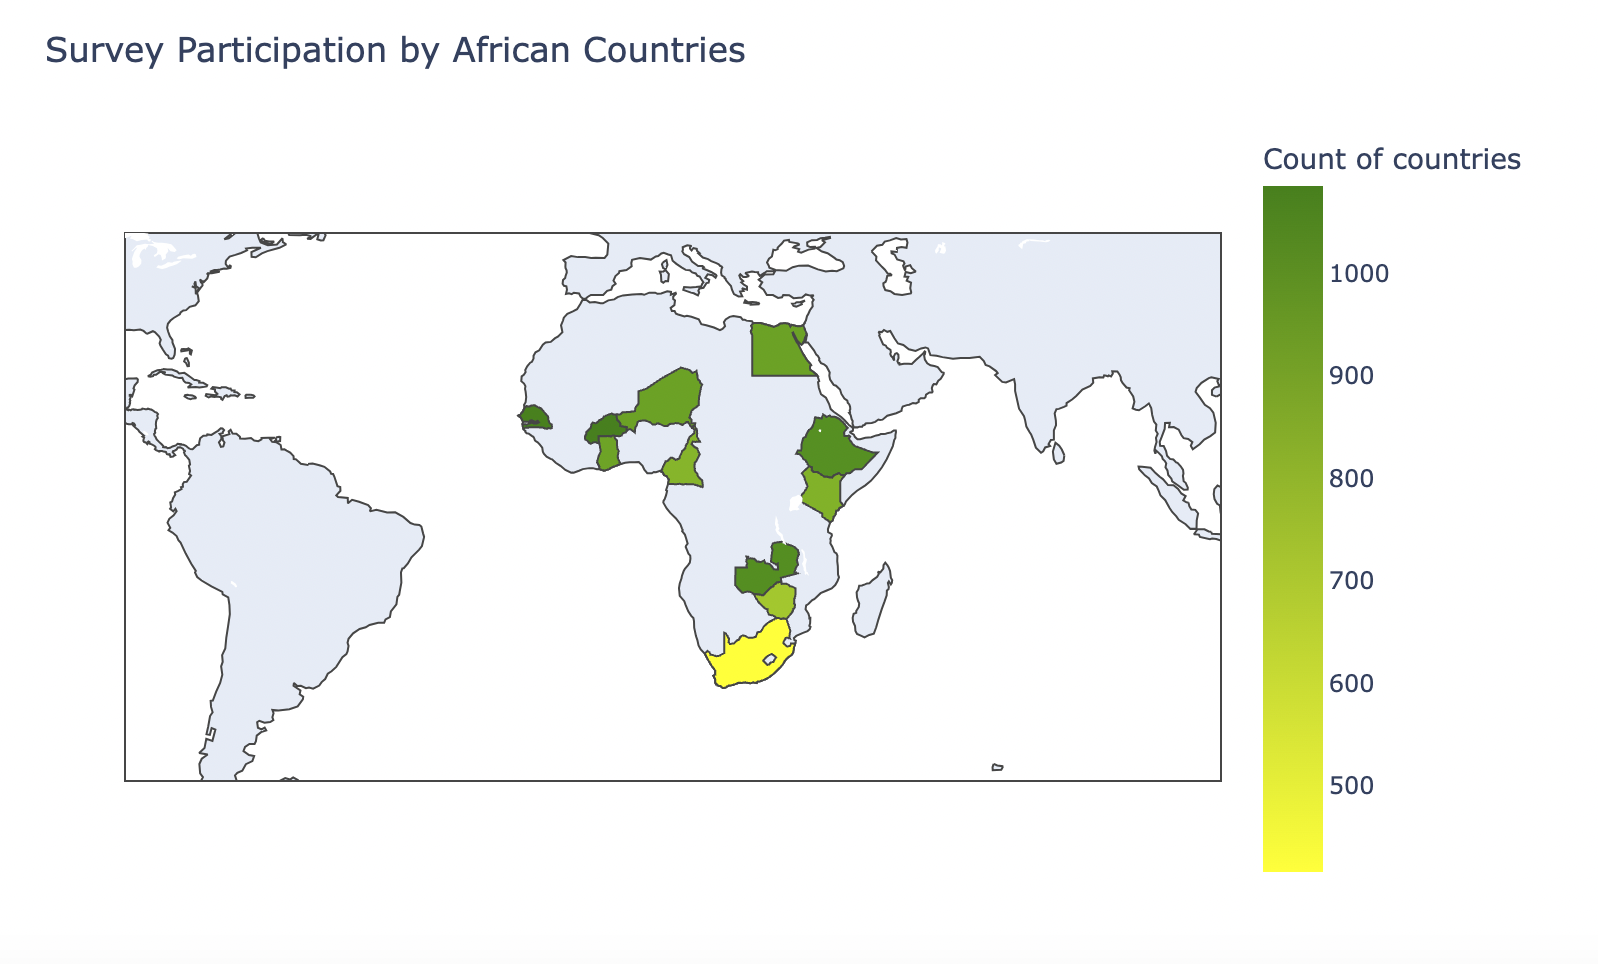

The Choropleth map depicts the distribution of the countries in the survey. `Eleven (11)` African Countries participated in the survey namely; `Burkina Faso`, `Egypt`, `Zimbabwe`, `Ethiopia`, `Ghana`, `Niger`, `Senegal`, `South Africa`, `Zambia`, `Cameroon`, and `Kenya`.`Burkina Faso` had the highest number of participants (n=1085), this is followed by `Senegal (n=1078)`, and `South Africa` has the least particpants in the survey, `n=416`.

### Q2 <span style='color:green'> What is the distribution of Livestock according to Countries?</span>

In [5]:
data_livestock=(df.groupby('adm0').aggregate({'total_livestocks_owned':'mean'}).round().
                rename(columns={'total_livestocks_owned':'average_no_of_livestock_per_family'}))

fig = px.choropleth(data_livestock, 
                    locations=data_livestock.index,
                    locationmode="country names",
                    color='average_no_of_livestock_per_family',
                    scope="africa",
                    width=800,
                    color_continuous_scale=['red','green']
                    #"Viridis"
                   )


# Set the title and display the figure
fig.update_layout(
    title="Distribution of total livestocks owned by Countries")
    

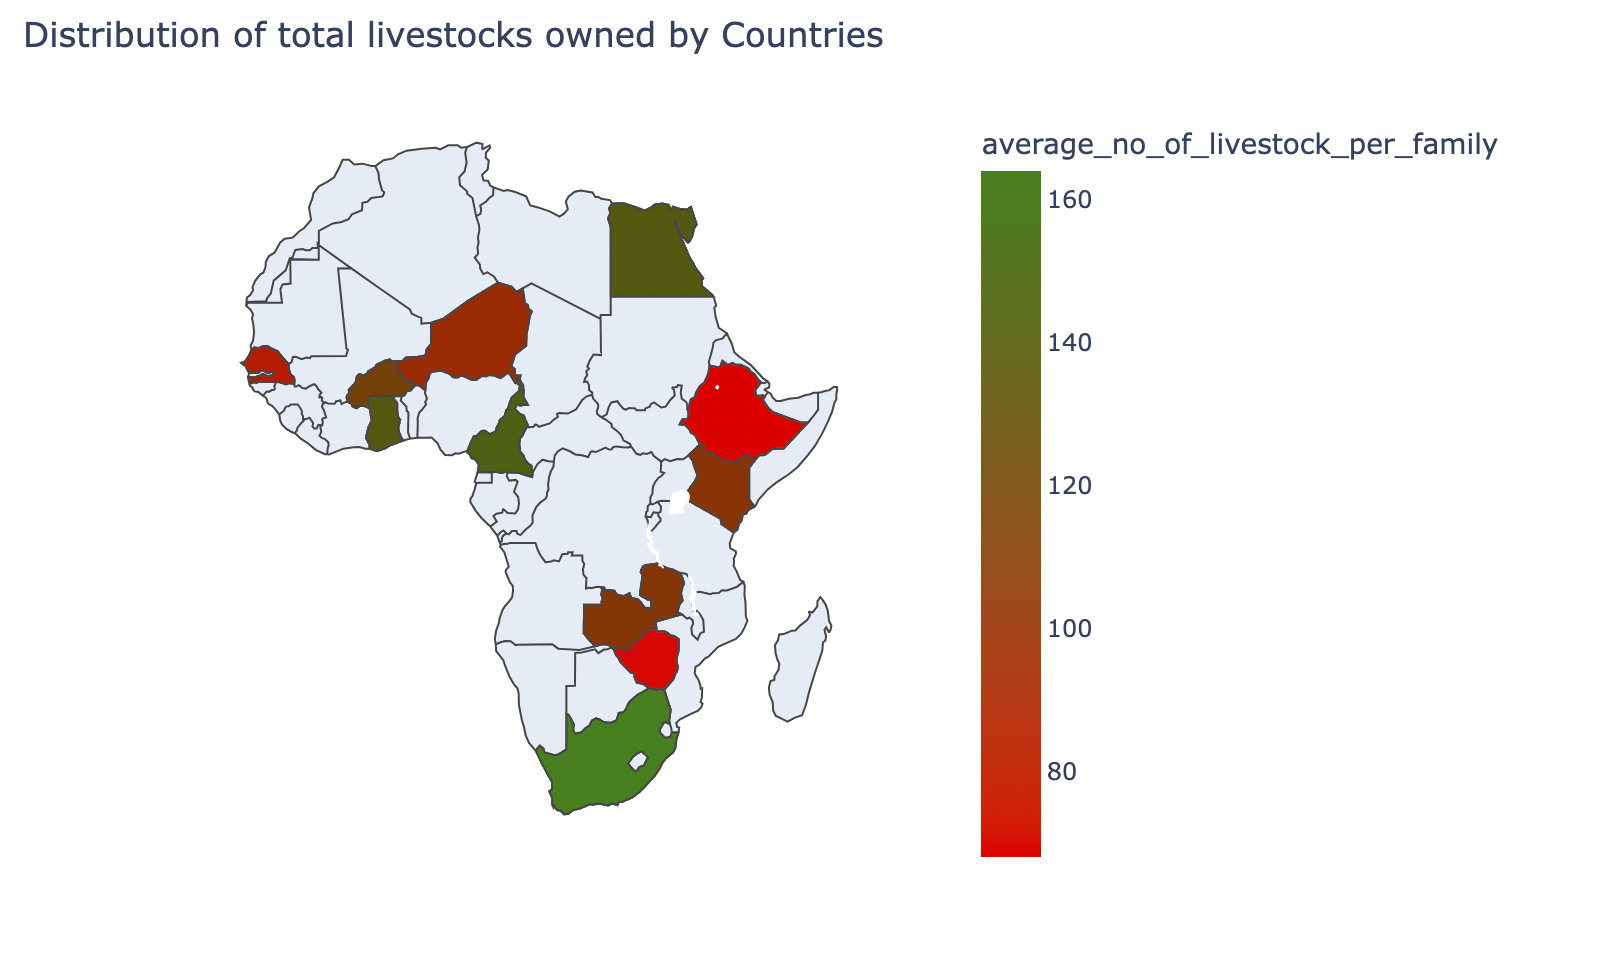

The Choropleth above depicts the number of households with livestocks across the african countries in the survey. Of the households left in the data set after the cleaning process. 

From the map, we observe many things. `South Africa`, `Cameroon`,`Egypt`, and `Ghana` had families with the highest number of livestocks owned. Reasons may be because of the geographical location of these countries which allows the rearing of livestocks.


### Q3 <span style='color:green'> What is the distribution of the household family size?</span>

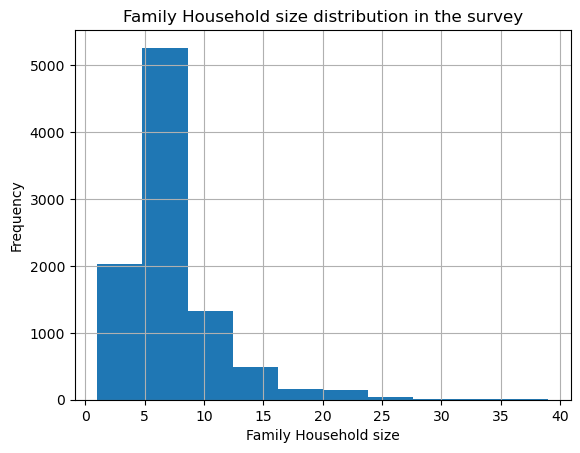

In [6]:
df['hhsize'].hist()
plt.xlabel('Family Household size')
plt.ylabel('Frequency')
plt.title('Family Household size distribution in the survey')
plt.show()

From the chart we can observe that most of the families had a moderate size of about 7 with most of the families below this number. The distribution is quite skewed to the right with fewer families above 7.

### Q4 <span style='color:green'>what is the average farm income per family in each country?</span>    

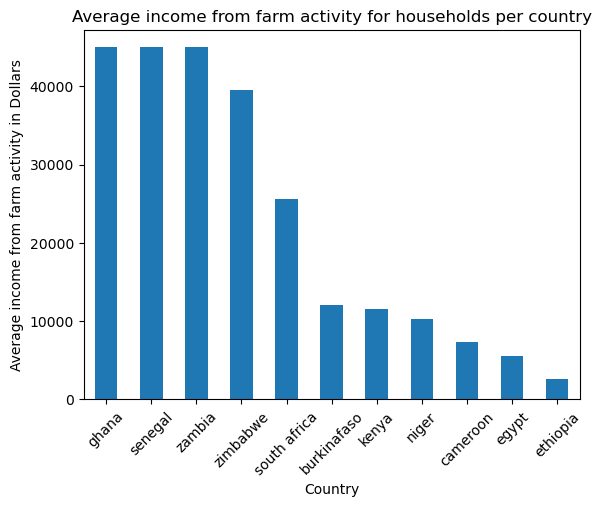

In [7]:
(df[['adm0','incfarm']].groupby('adm0').aggregate({'incfarm':'mean'}).
 rename(columns={'incfarm':'average_income per_family_per_country'}).
sort_values(by='average_income per_family_per_country',ascending=False).plot(kind='bar'))

plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Average income from farm activity in Dollars')
plt.title('Average income from farm activity for households per country')

plt.gca().get_legend().remove()

plt.show()

From the chart, `Ghana`,`Senegal`,`Zambia` and `Zimbabwe` have the highest average income from farm activities per family with average earnings over 40,000 USD. A possible explanation of this could be that the families that were interviewed in these countries were professional farmers and farm in a commercial setting. Another reason could also be the data validity. The currencies for each country were converted to the dollar from the local currency. The data inconsistency may be as result of collection error by the questionnaire.

We also notice a similar pattern for `Zimbabwe` suggesting either a commercial farming system in Zimbabwe or a data collection error.

Every other country earn below the `2000 dollars` benchmark, suggesting either a major subsistence means of farming or medium scale farming in those countries 

### Q5: <span style='color:green'> Among the two seasons, which seasons suffered more loss? </span>

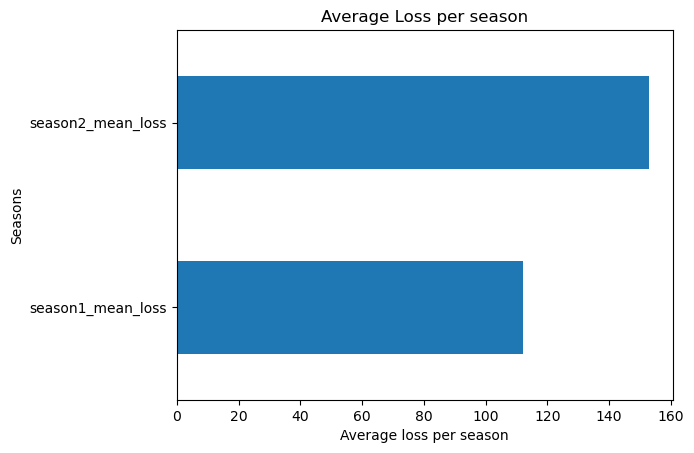

In [8]:
df[['season1_mean_loss','season2_mean_loss']].mean().plot(kind='barh')
plt.xlabel('Average loss per season')
plt.ylabel('Seasons')
plt.title('Average Loss per season')
plt.show()

From the horizontal bar plot of `season1` and `season2` mean losses, `season2` suffered more loss with a mean loss of `179.40` than season1 with a mean loss of 41.77

### Q6: <span style='color:green'>What is the impact of use of Fertilizer and Pesticides on family income</span>

In [9]:
df[['costkgfert','season1_avg_pesticide','incfarm']].corr()

costkgfert  season1_avg_pesticide   incfarm
costkgfert               1.000000              -0.081518  0.217975
season1_avg_pesticide   -0.081518               1.000000  0.077621
incfarm                  0.217975               0.077621  1.000000

There seem to be no direct relationship or impact of the use of pesticides or fertilizer on the family income

### Q7: <span style='color:green'>What is the most common farm practice according to country?</span>

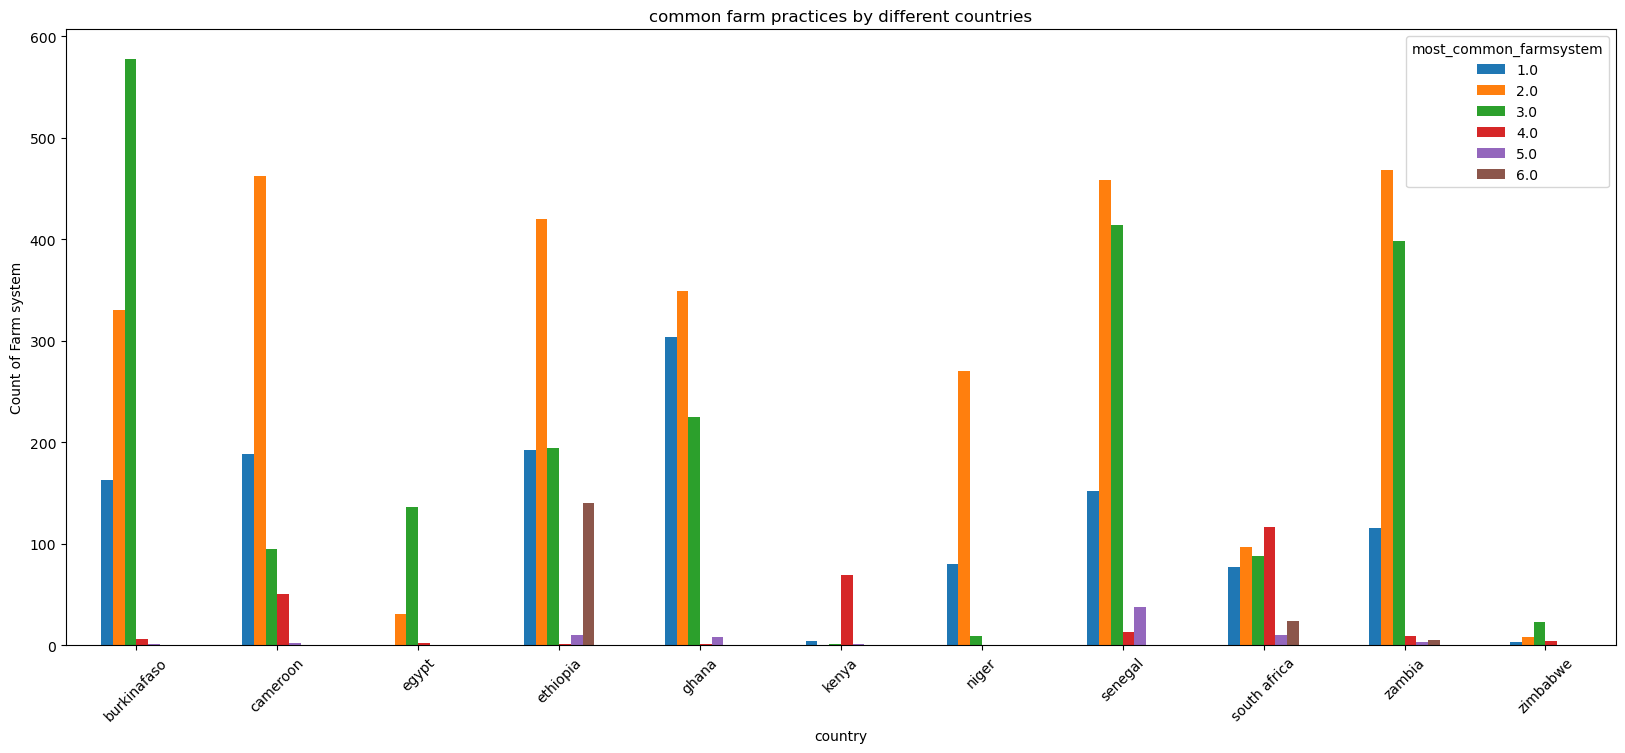

In [13]:
country_practices= df.groupby('adm0')['most_common_farmsystem'].value_counts().unstack().fillna(0)

#we plot a bar chart showing the frequently used farming system by each country
#key
#1: Shifting cultivation (With long fallow period)
#2: Continuous cropping (no fallow period)
#3: Continuous cropping with multiple rotations (includes short fallow period)
#4: Livestock grazing land
#5: Other
#6: Combination of above

country_practices.plot(kind= 'bar', figsize=(20,8))
plt.title('common farm practices by different countries')
plt.xlabel('country')
plt.ylabel('Count of Farm system')
plt.legend(title= 'most_common_farmsystem', loc= 'upper right')
plt.xticks(rotation=45)
plt.show()

We can observe that the most common farm practice in most countries is `2-Continuous cropping (no fallow period)` which signifies a continuous use of the farm all year round. 
The exception is in Burkinafaso whose most common farm practice is Continuous cropping with multiple rotations (includes short fallow period)

### Q8: <span style ='color:green'>What is the avg no of equipment per household in country?</span>

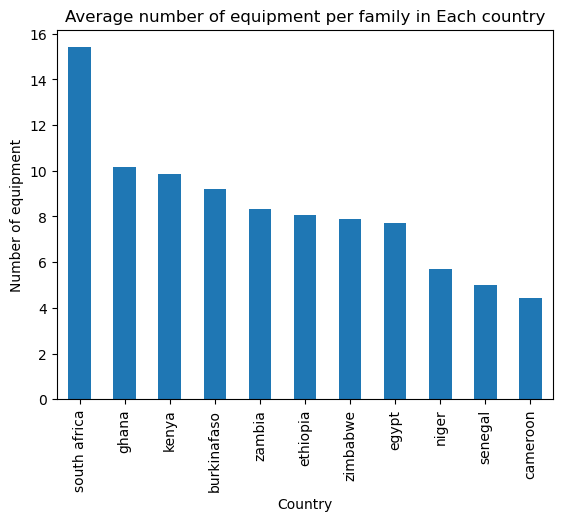

In [15]:
df.groupby('adm0')['avg_no_equipment',].mean().sort_values(by='avg_no_equipment',ascending=False).plot(kind='bar')
plt.gca().get_legend().remove()
plt.title('Average number of equipment per family in Each country')
plt.xlabel('Country')
plt.ylabel('Number of equipment')
plt.show()

From the chart above, we can observe that South Africa has higher use of equipments for farming more than any other country.There seems to be no significant difference among the rest countries

### Q9: <span style='color:green'>Is there an effect of equipment use on the family income?</span>

In [17]:
fig = px.scatter(data_frame=df, x="avg_no_equipment", y="incfarm")

fig.update_yaxes(title_text='Family_Income')
fig.update_layout(title='Correlation betwee Average number of equipment and Family Income\n', 
                  title_x=0.5, title_xanchor="center")

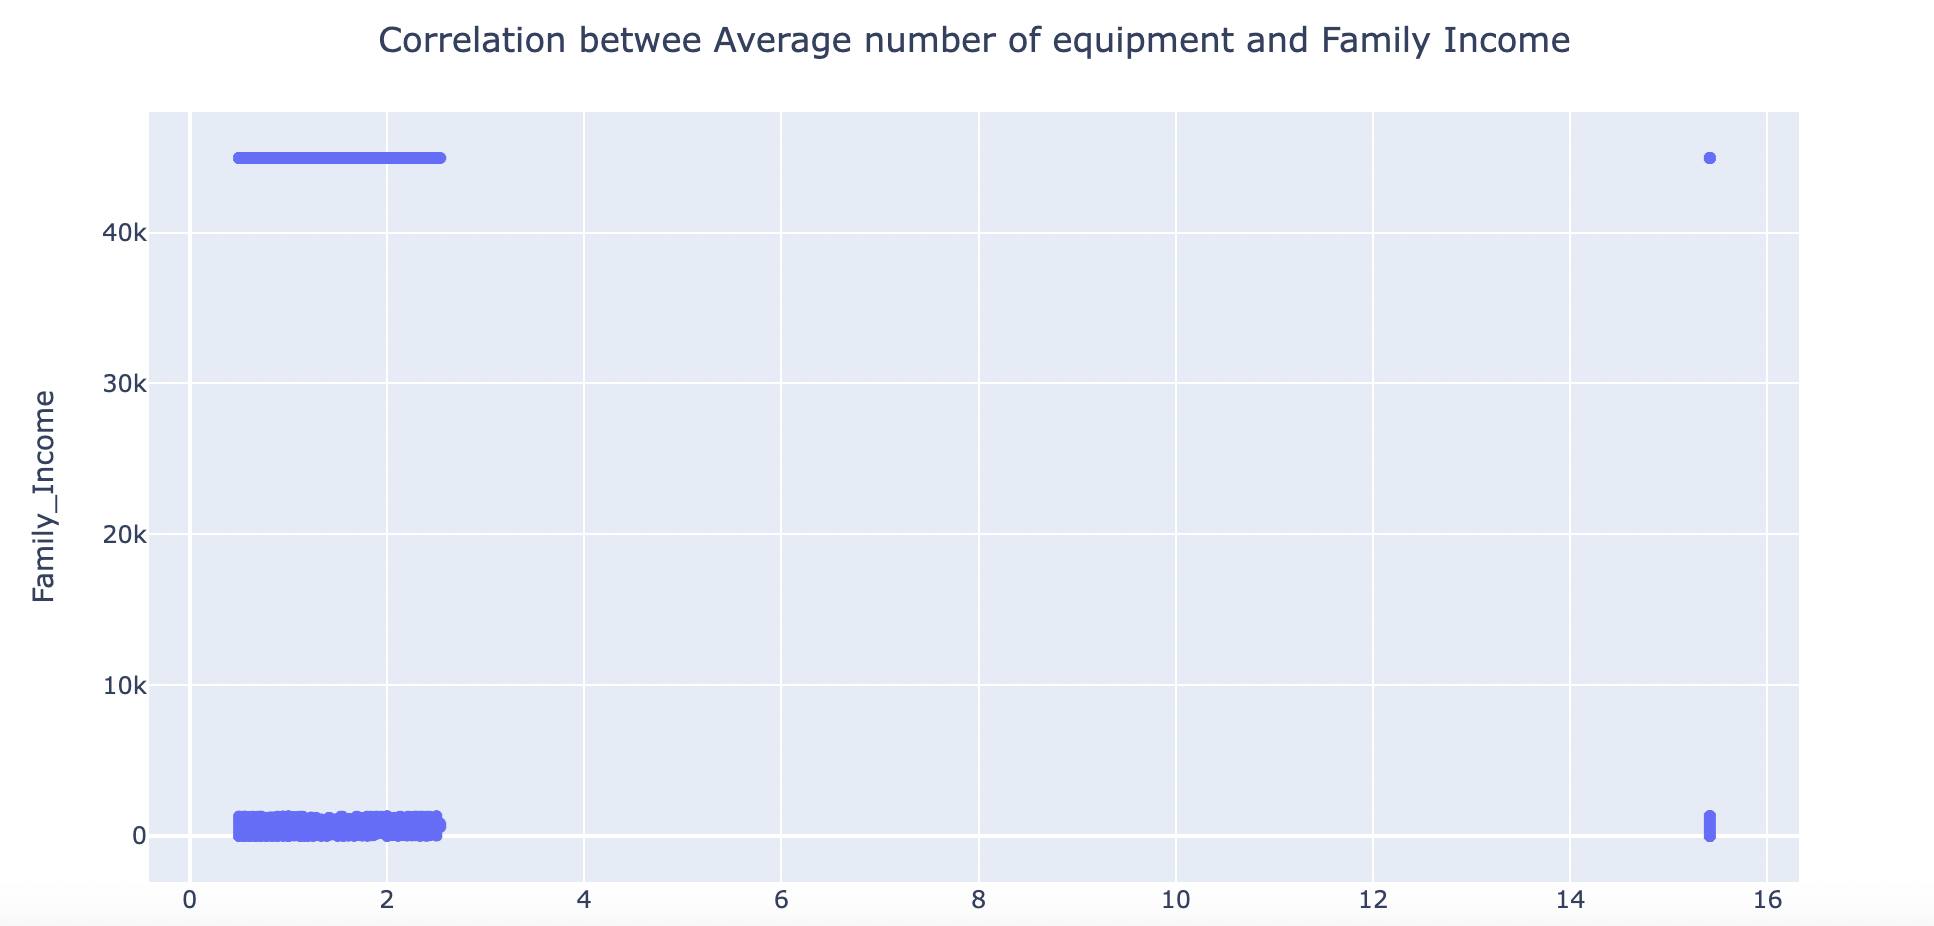

From the chart result above, the equipment use/ lifespan does not have a direct effect on the family income

### Q10: <span style='color:green'>what is the most common adaptation strategy to climate change?</span>

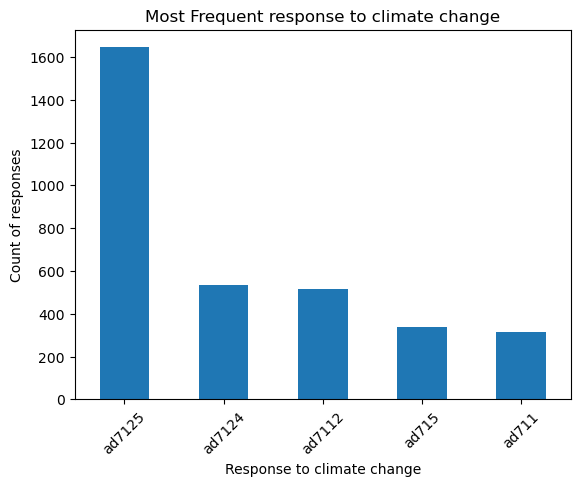

In [18]:
#plotting the top 5 responses in response to climate change
df['adaptation_to_climate'].value_counts().head(5).plot(kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Response to climate change')
plt.ylabel('Count of responses')
plt.title('Most Frequent response to climate change');

#key:
#ad7125: Adaptation Climatic Variation: No Adaptation

#ad7112: Adaptation Climatic Variation: Change from Farming to Non-Farming Activities

#ad7124: Adaptation Climatic Variation: Other

#ad711: Adaptation Climatic Variation: Different Varieties

#ad715: Adaptation Climatic Variation: Shortening the Length of the Growing Season

According to the charts, we observe that most of the farmers do not adopt strategies to respond to climate change. over 1000 of the respondents notified that they do not make any adjustments to climate change.